# Regression Homework

For your homework this week you will study real estate prices in New York City. Specifically, our goal is to understand what factors determine the price of residential real estate in NYC over the last 4 years- 2018-2021. 

The data is collected from NYC's finance departments website (https://www1.nyc.gov/site/finance/taxes/property-annualized-sales-update.page). I pulled data from three boroughs (Manhattan, Brooklyn and Queens) over four years 2018-2021.

The variables are:

|Variable|Definition|
|:---------|:-----------|
|Borough|Number representing the borough in which the sale took place <br>
||1 = Manhattan <br>
||3 = Brooklyn <br>
||4 = Queens |
|Neighborhood| Name of neighborhood in which the sale took place|
|Building Class Category| Broad category of building class (eg. one family, multi family)|
|BLOCK| A tax block is a subdivision of the borough|
|Lot| A tax lot is a subdivision of a tax block. Distinguishes condos in the same building|
|ADDRESS| Street address of the property|
|APARTMENTNUMBER| Apartment number of the property if applicable|
|ZIPCODE| Property's postal code|
|RESIDENTIALUNITS| Number of residential units at the listed property|
|COMMERCIALUNITS| The number of commercial units at the listed property|
|TOTALUNITS| The total number of units at the listed property|
|LANDSQUAREFEET| The land area of the property list in square feet|
|GROSSSQUAREFEET| The total area of all the floors of a building as measured from the exterior surfaces of the outside walls of the building, including the land area and space within any building or structure on the property. |
|YEARBUILT| Year the structure on the property was built|
|TAXCLASSATTIMEOFSALE| - Class 1: Includes most residential property of up to three units, vacant land that is zoned for residential use, and most condominiums that are not more than three stories. <br>
||- Class 2: Includes all other property that is primarily residential, such as cooperatives and condominiums. <br>
||- Class 3: Includes property with equipment owned by a gas, telephone or electric company. <br>
||- Class 4: Includes all other properties not included in class 1,2, and 3, such as offices, factories, warehouses, garage buildings, etc.  |
|BUILDINGCLASSATTIMEOFSALE|The Building Classification is used to describe a property’s constructive use.<br>
||The Letter describes a general class of properties (for example “A” signifies one-family homes, “O” signifies office buildings. “R” signifies condominiums).<br>
||The Number adds more specific information about the property’s use or construction style (using our previous examples “A0” is a Cape Cod style one family home, “O4” is a tower type office building and “R5” is a commercial condominium unit). <br>
||https://www1.nyc.gov/assets/finance/jump/hlpbldgcode.html|
|SALEPRICE| Price paid for the property|
|SALEDATE| Date the property sold|

<font color='blue' size = '5'> Task 1 </font>

Review my cleaning code below. Make sure you understand what I have done. Fill in the #'s throughout to notate what I did.

If you would like extra credit- rewrite the code as a loop. Specifically you should write one loop that clean all of the excel files before they are combined into one dataframe.

In [157]:
# Import database tools
import pandas as pd 
import numpy as np

# Import graphing tools
import seaborn as sns
import matplotlib.pyplot as plt

# Import regression library
import statsmodels.formula.api as smf

pd.options.display.float_format = '{:,.2f}'.format

In [158]:
# The data in our xlsx file starts at row 5, which is row "header" 4 in pandas.
# Thus, read the manhattan2018 and manhattan2019 xlsx dataset into pandas from header 4 

manhattan2018 = pd.read_excel('2018_manhattan.xlsx', header =4)

manhattan2019 = pd.read_excel('2019_manhattan.xlsx', header =4)

In [159]:
# The data in our xlsx file starts at row 7, which is row "header" 6 in pandas.
# Thus, read the manhattan2020 and manhattan2021 xlsx dataset into pandas from header 6 

manhattan2020 = pd.read_excel('2020_manhattan.xlsx', header =6)

manhattan2021 = pd.read_excel('2021_manhattan.xlsx', header =6)

In [160]:
# Return all columns from manhattan2018
manhattan2018.columns

Index(['BOROUGH\n', 'NEIGHBORHOOD\n', 'BUILDING CLASS CATEGORY\n',
       'TAX CLASS AS OF FINAL ROLL 18/19', 'BLOCK\n', 'LOT\n', 'EASE-MENT\n',
       'BUILDING CLASS AS OF FINAL ROLL 18/19', 'ADDRESS\n',
       'APARTMENT NUMBER\n', 'ZIP CODE\n', 'RESIDENTIAL UNITS\n',
       'COMMERCIAL UNITS\n', 'TOTAL UNITS\n', 'LAND SQUARE FEET\n',
       'GROSS SQUARE FEET\n', 'YEAR BUILT\n', 'TAX CLASS AT TIME OF SALE\n',
       'BUILDING CLASS AT TIME OF SALE\n', 'SALE PRICE\n', 'SALE DATE\n'],
      dtype='object')

In [161]:
# Replace ‘\n’ with ‘‘ space in the column names for manhattan2018, manhattan2019, manhattan2020, manhattan2021
manhattan2018.columns = manhattan2018.columns.str.replace(pat = '\n', repl = '')

manhattan2019.columns = manhattan2019.columns.str.replace(pat = '\n', repl = '')

manhattan2020.columns = manhattan2020.columns.str.replace(pat = '\n', repl = '')

manhattan2021.columns = manhattan2021.columns.str.replace(pat = '\n', repl = '')

In [162]:
# Replace ‘ ’ with ‘‘ space in the column names
manhattan2018.columns = manhattan2018.columns.str.replace(pat = ' ', repl = '')

manhattan2019.columns = manhattan2019.columns.str.replace(pat = ' ', repl = '')

manhattan2020.columns = manhattan2020.columns.str.replace(pat = ' ', repl = '')

manhattan2021.columns = manhattan2021.columns.str.replace(pat = ' ', repl = '')

In [163]:
# Print to see if the column names from manhattan2018 matches column names from manhattan2020, manhattan2019, manhattan2021

print(manhattan2018.columns == manhattan2020.columns)

print(manhattan2018.columns == manhattan2019.columns)

print(manhattan2018.columns == manhattan2021.columns)

[ True  True  True False  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True]
[ True  True  True False  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True]


In [164]:
# Check manhattan2018 column names
manhattan2018.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDINGCLASSCATEGORY',
       'TAXCLASSASOFFINALROLL18/19', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDINGCLASSASOFFINALROLL18/19', 'ADDRESS', 'APARTMENTNUMBER',
       'ZIPCODE', 'RESIDENTIALUNITS', 'COMMERCIALUNITS', 'TOTALUNITS',
       'LANDSQUAREFEET', 'GROSSSQUAREFEET', 'YEARBUILT',
       'TAXCLASSATTIMEOFSALE', 'BUILDINGCLASSATTIMEOFSALE', 'SALEPRICE',
       'SALEDATE'],
      dtype='object')

In [165]:
# Check manhattan2020 column names
manhattan2020.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDINGCLASSCATEGORY', 'TAXCLASSATPRESENT',
       'BLOCK', 'LOT', 'EASE-MENT', 'BUILDINGCLASSATPRESENT', 'ADDRESS',
       'APARTMENTNUMBER', 'ZIPCODE', 'RESIDENTIALUNITS', 'COMMERCIALUNITS',
       'TOTALUNITS', 'LANDSQUAREFEET', 'GROSSSQUAREFEET', 'YEARBUILT',
       'TAXCLASSATTIMEOFSALE', 'BUILDINGCLASSATTIMEOFSALE', 'SALEPRICE',
       'SALEDATE'],
      dtype='object')

In [166]:
# Pick certain column names and assign them as manhattan2018, manhattan2019, manhattan2020, manhattan2021

manhattan2018 = manhattan2018[['BOROUGH', 'NEIGHBORHOOD', 'BUILDINGCLASSCATEGORY', 'BLOCK', 'LOT', 'EASE-MENT',
                               'ADDRESS', 'APARTMENTNUMBER',
       'ZIPCODE', 'RESIDENTIALUNITS', 'COMMERCIALUNITS', 'TOTALUNITS',
       'LANDSQUAREFEET', 'GROSSSQUAREFEET', 'YEARBUILT',
       'TAXCLASSATTIMEOFSALE', 'BUILDINGCLASSATTIMEOFSALE', 'SALEPRICE',
       'SALEDATE']]

manhattan2019 = manhattan2019[['BOROUGH', 'NEIGHBORHOOD', 'BUILDINGCLASSCATEGORY', 'BLOCK', 'LOT', 'EASE-MENT',
                               'ADDRESS', 'APARTMENTNUMBER',
       'ZIPCODE', 'RESIDENTIALUNITS', 'COMMERCIALUNITS', 'TOTALUNITS',
       'LANDSQUAREFEET', 'GROSSSQUAREFEET', 'YEARBUILT',
       'TAXCLASSATTIMEOFSALE', 'BUILDINGCLASSATTIMEOFSALE', 'SALEPRICE',
       'SALEDATE']]

manhattan2020 = manhattan2020[['BOROUGH', 'NEIGHBORHOOD', 'BUILDINGCLASSCATEGORY', 'BLOCK', 'LOT', 'EASE-MENT',
                               'ADDRESS', 'APARTMENTNUMBER',
       'ZIPCODE', 'RESIDENTIALUNITS', 'COMMERCIALUNITS', 'TOTALUNITS',
       'LANDSQUAREFEET', 'GROSSSQUAREFEET', 'YEARBUILT',
       'TAXCLASSATTIMEOFSALE', 'BUILDINGCLASSATTIMEOFSALE', 'SALEPRICE',
       'SALEDATE']]

manhattan2021 = manhattan2021[['BOROUGH', 'NEIGHBORHOOD', 'BUILDINGCLASSCATEGORY', 'BLOCK', 'LOT', 'EASE-MENT',
                               'ADDRESS', 'APARTMENTNUMBER',
       'ZIPCODE', 'RESIDENTIALUNITS', 'COMMERCIALUNITS', 'TOTALUNITS',
       'LANDSQUAREFEET', 'GROSSSQUAREFEET', 'YEARBUILT',
       'TAXCLASSATTIMEOFSALE', 'BUILDINGCLASSATTIMEOFSALE', 'SALEPRICE',
       'SALEDATE']]

In [167]:
# Merge manhattan2018, manhattan2019, manhattan2020, manhattan2021 dataframes into one dataframe called manhattan

manhattan = pd.concat([manhattan2018, manhattan2019, manhattan2020, manhattan2021])

In [168]:
# The data in our xlsx file starts at row 5, which is row "header" 4 in pandas.
# Thus, read brooklyn2018 and brooklyn2019 xlsx dataset into pandas from header 4. 

brooklyn2018 = pd.read_excel('2018_brooklyn.xlsx', header =4)

brooklyn2019 = pd.read_excel('2019_brooklyn.xlsx', header =4)

# The data in our xlsx file starts at row 7, which is row "header" 6 in pandas.
# Thus, read brooklyn2020 and brooklyn2021 xlsx dataset into pandas from header 6. 

brooklyn2020 = pd.read_excel('2020_brooklyn.xlsx', header =6)

brooklyn2021 = pd.read_excel('2021_brooklyn.xlsx', header =6)

In [169]:
# Check brooklyn2018 column names
brooklyn2018.columns

Index(['BOROUGH\n', 'NEIGHBORHOOD\n', 'BUILDING CLASS CATEGORY\n',
       'TAX CLASS AS OF FINAL ROLL 18/19', 'BLOCK\n', 'LOT\n', 'EASE-MENT\n',
       'BUILDING CLASS AS OF FINAL ROLL 18/19', 'ADDRESS\n',
       'APARTMENT NUMBER\n', 'ZIP CODE\n', 'RESIDENTIAL UNITS\n',
       'COMMERCIAL UNITS\n', 'TOTAL UNITS\n', 'LAND SQUARE FEET\n',
       'GROSS SQUARE FEET\n', 'YEAR BUILT\n', 'TAX CLASS AT TIME OF SALE\n',
       'BUILDING CLASS AT TIME OF SALE\n', 'SALE PRICE\n', 'SALE DATE\n'],
      dtype='object')

In [170]:
# Check brooklyn2020 column names
brooklyn2020.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL\nUNITS', 'COMMERCIAL\nUNITS', 'TOTAL \nUNITS',
       'LAND \nSQUARE FEET', 'GROSS \nSQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS\nAT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [171]:
# Replace ‘\n’ with ‘‘ space in the column names for brooklyn2018, brooklyn2019, brooklyn2020, broooklyn2021

brooklyn2018.columns = brooklyn2018.columns.str.replace(pat = '\n', repl = '')

brooklyn2019.columns = brooklyn2019.columns.str.replace(pat = '\n', repl = '')

brooklyn2020.columns = brooklyn2020.columns.str.replace(pat = '\n', repl = '')

brooklyn2021.columns = brooklyn2021.columns.str.replace(pat = '\n', repl = '')

# Replace ‘ ’ with ‘‘ space in the column names for brooklyn2018, brooklyn2019, brooklyn2020, broooklyn2021
brooklyn2018.columns = brooklyn2018.columns.str.replace(pat = ' ', repl = '')

brooklyn2019.columns = brooklyn2019.columns.str.replace(pat = ' ', repl = '')

brooklyn2020.columns = brooklyn2020.columns.str.replace(pat = ' ', repl = '')

brooklyn2021.columns = brooklyn2021.columns.str.replace(pat = ' ', repl = '')

In [172]:
# Print to see if the column names from brooklyn2018 matches column names from brooklyn2020, brooklyn2019, brooklyn2021
print(brooklyn2018.columns == brooklyn2020.columns)

print(brooklyn2018.columns == brooklyn2019.columns)

print(brooklyn2018.columns == brooklyn2021.columns)

[ True  True  True False  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True]
[ True  True  True False  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True]


In [173]:
# Pick certain column names and assign them as brooklyn2018, brooklyn2019, brooklyn2020, brooklyn2021
brooklyn2018 = brooklyn2018[['BOROUGH', 'NEIGHBORHOOD', 'BUILDINGCLASSCATEGORY', 'BLOCK', 'LOT', 'EASE-MENT',
                               'ADDRESS', 'APARTMENTNUMBER',
       'ZIPCODE', 'RESIDENTIALUNITS', 'COMMERCIALUNITS', 'TOTALUNITS',
       'LANDSQUAREFEET', 'GROSSSQUAREFEET', 'YEARBUILT',
       'TAXCLASSATTIMEOFSALE', 'BUILDINGCLASSATTIMEOFSALE', 'SALEPRICE',
       'SALEDATE']]

brooklyn2019 = brooklyn2019[['BOROUGH', 'NEIGHBORHOOD', 'BUILDINGCLASSCATEGORY', 'BLOCK', 'LOT', 'EASE-MENT',
                               'ADDRESS', 'APARTMENTNUMBER',
       'ZIPCODE', 'RESIDENTIALUNITS', 'COMMERCIALUNITS', 'TOTALUNITS',
       'LANDSQUAREFEET', 'GROSSSQUAREFEET', 'YEARBUILT',
       'TAXCLASSATTIMEOFSALE', 'BUILDINGCLASSATTIMEOFSALE', 'SALEPRICE',
       'SALEDATE']]

brooklyn2020 = brooklyn2020[['BOROUGH', 'NEIGHBORHOOD', 'BUILDINGCLASSCATEGORY', 'BLOCK', 'LOT', 'EASE-MENT',
                               'ADDRESS', 'APARTMENTNUMBER',
       'ZIPCODE', 'RESIDENTIALUNITS', 'COMMERCIALUNITS', 'TOTALUNITS',
       'LANDSQUAREFEET', 'GROSSSQUAREFEET', 'YEARBUILT',
       'TAXCLASSATTIMEOFSALE', 'BUILDINGCLASSATTIMEOFSALE', 'SALEPRICE',
       'SALEDATE']]

brooklyn2021 = brooklyn2021[['BOROUGH', 'NEIGHBORHOOD', 'BUILDINGCLASSCATEGORY', 'BLOCK', 'LOT', 'EASE-MENT',
                               'ADDRESS', 'APARTMENTNUMBER',
       'ZIPCODE', 'RESIDENTIALUNITS', 'COMMERCIALUNITS', 'TOTALUNITS',
       'LANDSQUAREFEET', 'GROSSSQUAREFEET', 'YEARBUILT',
       'TAXCLASSATTIMEOFSALE', 'BUILDINGCLASSATTIMEOFSALE', 'SALEPRICE',
       'SALEDATE']]


# Merge brooklyn2018, brooklyn2019, brooklyn2020, brooklyn2021 dataframes into one dataframe called brooklyn
brooklyn = pd.concat([brooklyn2018, brooklyn2019, brooklyn2020, brooklyn2021])

In [174]:
# The data in our xlsx file starts at row 5, which is row "header" 4 in pandas.
# Thus, read queens2018 and queens2019 xlsx dataset into pandas from header 4. 

queens2018 = pd.read_excel('2018_queens.xlsx', header =4)

queens2019 = pd.read_excel('2019_queens.xlsx', header =4)

# The data in our xlsx file starts at row 7, which is row "header" 6 in pandas.
# Thus, read queens2018 and queens2019 xlsx dataset into pandas from header 6. 

queens2020 = pd.read_excel('2020_queens.xlsx', header =6)

queens2021 = pd.read_excel('2021_queens.xlsx', header =6)


# Replace ‘\n’ with ‘‘ space in the column names for queens2018, queens2019, queens2020, queens2021

queens2018.columns = queens2018.columns.str.replace(pat = '\n', repl = '')

queens2019.columns = queens2019.columns.str.replace(pat = '\n', repl = '')

queens2020.columns = queens2020.columns.str.replace(pat = '\n', repl = '')

queens2021.columns = queens2021.columns.str.replace(pat = '\n', repl = '')

# Replace ‘ ’ with ‘‘ space in the column names for queens2018, queens2019, queens2020, queens2021
queens2018.columns = queens2018.columns.str.replace(pat = ' ', repl = '')

queens2019.columns = queens2019.columns.str.replace(pat = ' ', repl = '')

queens2020.columns = queens2020.columns.str.replace(pat = ' ', repl = '')

queens2021.columns = queens2021.columns.str.replace(pat = ' ', repl = '')


# Pick certain column names and assign them as queens2018, queens2019, queens2020, queens2021
queens2018 = queens2018[['BOROUGH', 'NEIGHBORHOOD', 'BUILDINGCLASSCATEGORY', 'BLOCK', 'LOT', 'EASE-MENT',
                               'ADDRESS', 'APARTMENTNUMBER',
       'ZIPCODE', 'RESIDENTIALUNITS', 'COMMERCIALUNITS', 'TOTALUNITS',
       'LANDSQUAREFEET', 'GROSSSQUAREFEET', 'YEARBUILT',
       'TAXCLASSATTIMEOFSALE', 'BUILDINGCLASSATTIMEOFSALE', 'SALEPRICE',
       'SALEDATE']]

queens2019 = queens2019[['BOROUGH', 'NEIGHBORHOOD', 'BUILDINGCLASSCATEGORY', 'BLOCK', 'LOT', 'EASE-MENT',
                               'ADDRESS', 'APARTMENTNUMBER',
       'ZIPCODE', 'RESIDENTIALUNITS', 'COMMERCIALUNITS', 'TOTALUNITS',
       'LANDSQUAREFEET', 'GROSSSQUAREFEET', 'YEARBUILT',
       'TAXCLASSATTIMEOFSALE', 'BUILDINGCLASSATTIMEOFSALE', 'SALEPRICE',
       'SALEDATE']]

queens2020 = queens2020[['BOROUGH', 'NEIGHBORHOOD', 'BUILDINGCLASSCATEGORY', 'BLOCK', 'LOT', 'EASE-MENT',
                               'ADDRESS', 'APARTMENTNUMBER',
       'ZIPCODE', 'RESIDENTIALUNITS', 'COMMERCIALUNITS', 'TOTALUNITS',
       'LANDSQUAREFEET', 'GROSSSQUAREFEET', 'YEARBUILT',
       'TAXCLASSATTIMEOFSALE', 'BUILDINGCLASSATTIMEOFSALE', 'SALEPRICE',
       'SALEDATE']]

queens2021 = queens2021[['BOROUGH', 'NEIGHBORHOOD', 'BUILDINGCLASSCATEGORY', 'BLOCK', 'LOT', 'EASE-MENT',
                               'ADDRESS', 'APARTMENTNUMBER',
       'ZIPCODE', 'RESIDENTIALUNITS', 'COMMERCIALUNITS', 'TOTALUNITS',
       'LANDSQUAREFEET', 'GROSSSQUAREFEET', 'YEARBUILT',
       'TAXCLASSATTIMEOFSALE', 'BUILDINGCLASSATTIMEOFSALE', 'SALEPRICE',
       'SALEDATE']]

# Merge queens2018, queens2019, queens2020, queens2021 dataframes into one dataframe called queens
queens = pd.concat([queens2018, queens2019, queens2020, queens2021])

In [175]:
# EXTRA CREDIT PT
# Loop to clean data (assuming that we haven't run the previous individual cells that cleaned data) before merging


# List of num files to clean
files = ['2018_manhattan.xlsx', '2019_manhattan.xlsx', '2020_manhattan.xlsx', '2021_manhattan.xlsx', \
         '2018_brooklyn.xlsx', '2019_brooklyn.xlsx', '2020_brooklyn.xlsx', '2021_brooklyn.xlsx' \
         '2018_queens.xlsx', '2019_queens.xlsx', '2020_queens.xlsx', '2021_queens.xlsx']


# Total Compilation Variable (create an empty list to append cleaned dataset)
nyc_subset = {}

for file in files:
  # DATA LOADING (Manhattan, Brooklyn, and Queens 2018 - 2019)
  if (file[0:4] == '2018' or file[0:7] == '2019'):
    year = file[0:7]

    # Load nyc from the excel sheet that starts with '2018' or '2019'
    nyc = pd.read_excel(file, header = 4)
    
    # Replace the column names '\n' and ' ' with '' in manbrookqueens_df
    nyc.columns = df.columns.str.replace(pat = '\n', repl = '')
    nyc.columns = df.columns.str.replace(pat = ' ', repl = '')
    
    # Pick certain columns to include in nyc_final
    nyc_final = nyc[['BOROUGH', 'NEIGHBORHOOD', 'BUILDINGCLASSCATEGORY', 'BLOCK', 'LOT', 'EASE-MENT', \
                               'ADDRESS', 'APARTMENTNUMBER', 'ZIPCODE', 'RESIDENTIALUNITS', 'COMMERCIALUNITS', 'TOTALUNITS', \
                            'LANDSQUAREFEET', 'GROSSSQUAREFEET', 'YEARBUILT', 'TAXCLASSATTIMEOFSALE', 'BUILDINGCLASSATTIMEOFSALE', \ 
                            'SALEPRICE', 'SALEDATE']]

  # DATA LOADING (Manhattan, Brooklyn, and Queens 2020 - 2021)                
  else:
    # Load nyc from the excel sheet that doesn't starts with '2018' or '2019' 
    nyc = pd.read_excel(file, header = 6)
    
     # Replace the column names '\n' and ' ' with '' in manbrookqueens_df
    nyc.columns = df.columns.str.replace(pat = '\n', repl = '')
    nyc.columns = df.columns.str.replace(pat = ' ', repl = '')
    
    # Pick certain columns to include in nyc_final
    nyc_final = nyc[['BOROUGH', 'NEIGHBORHOOD', 'BUILDINGCLASSCATEGORY', 'BLOCK', 'LOT', 'EASE-MENT', \
                               'ADDRESS', 'APARTMENTNUMBER', 'ZIPCODE', 'RESIDENTIALUNITS', 'COMMERCIALUNITS', 'TOTALUNITS', \
                            'LANDSQUAREFEET', 'GROSSSQUAREFEET', 'YEARBUILT', 'TAXCLASSATTIMEOFSALE', 'BUILDINGCLASSATTIMEOFSALE', \ 
                            'SALEPRICE', 'SALEDATE']] 


In [176]:
#BACK TO NO LOOP CLEANING
# Merge manhattan, brooklyn, queens dataframes into one dataframe called nyc
nyc = pd.concat([manhattan, brooklyn, queens])

# Print the information inside the nyc dataframe
nyc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270443 entries, 0 to 29812
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   BOROUGH                    270437 non-null  float64       
 1   NEIGHBORHOOD               270437 non-null  object        
 2   BUILDINGCLASSCATEGORY      270437 non-null  object        
 3   BLOCK                      270437 non-null  float64       
 4   LOT                        270437 non-null  float64       
 5   EASE-MENT                  0 non-null       float64       
 6   ADDRESS                    270437 non-null  object        
 7   APARTMENTNUMBER            72218 non-null   object        
 8   ZIPCODE                    270427 non-null  float64       
 9   RESIDENTIALUNITS           221574 non-null  float64       
 10  COMMERCIALUNITS            203824 non-null  float64       
 11  TOTALUNITS                 224541 non-null  float64  

In [177]:
# Since we merged every dataframe horizontally previously, drop column 'EASE-MENT' all together in one dataframe called 'nyc'.
nyc = nyc.drop(['EASE-MENT'], axis = 1)

In [178]:
# Convert datatypes 'BOROUGH', 'BLOCK', 'LOT', 'ZIPCODE', 'TAXCLASSATTIMEOFSALE', 'YEARBUILT' as string 
nyc['BOROUGH'] = nyc['BOROUGH'].astype(str)

nyc['BLOCK'] = nyc['BLOCK'].astype(str)

nyc['LOT'] = nyc['LOT'].astype(str)

nyc['ZIPCODE'] = nyc['ZIPCODE'].astype(str)

nyc['TAXCLASSATTIMEOFSALE'] = nyc['TAXCLASSATTIMEOFSALE'].astype(str)

nyc['YEARBUILT'] = nyc['YEARBUILT'].astype(str)

In [179]:
# Return a series containing counts of unique values from column 'YEARBUILT' in nyc dataframe 
nyc['YEARBUILT'].value_counts()

1920.0    21470
1930.0    17875
1925.0    15175
nan       14494
1910.0    11642
          ...  
1832.0        1
1884.0        1
1822.0        1
1838.0        1
1030.0        1
Name: YEARBUILT, Length: 194, dtype: int64

In [180]:
# Return values that corresponds to index 0 to 4 inside 'YEARBUILT' column inside nyc dataframe
nyc['YEARBUILT'] = nyc['YEARBUILT'].str[0:4]

nyc['YEARBUILT'].head()

0    1860
1    1860
2    1900
3    1899
4    1900
Name: YEARBUILT, dtype: object

In [181]:
# Format year as a four digit number and override error by returning NaT (missing value) for any values that do not conform
nyc['YEARBUILT'] = pd.to_datetime(nyc['YEARBUILT'], format = '%Y', errors='coerce')

In [182]:
# Drop null values from column 'SALEPRICE' and 'GROSSSQUAREFEET' inside the nyc dataframe 
nyc.dropna(subset = ['SALEPRICE'], inplace = True)

nyc.dropna(subset = ['GROSSSQUAREFEET'], inplace = True)

In [183]:
# Return a tuple that contains the nyc dataframe's dimensionality
nyc.shape

(200857, 18)

In [184]:
# Return only the year of the values from column 'SALEDATE' and rename column name into 'saleyear'
nyc['saleyear'] = nyc['SALEDATE'].dt.year

# Return a series containing counts of unique values from column 'saleyear' in nyc dataframe 
nyc['saleyear'].value_counts()

2018    67092
2019    51920
2020    43070
2021    38775
Name: saleyear, dtype: int64

In [185]:
# Return a series containing counts of unique values from column 'TAXCLASSATTIMEOFSALE' in nyc dataframe 
nyc['TAXCLASSATTIMEOFSALE'].value_counts()

1.0    118258
2.0     66498
4.0     16101
Name: TAXCLASSATTIMEOFSALE, dtype: int64

In [186]:
# only keep residential sales
nyc_subset = nyc[(nyc['TAXCLASSATTIMEOFSALE'] =='1.0') | (nyc['TAXCLASSATTIMEOFSALE'] =='2.0')]

In [187]:
# Return a series containing counts of unique values from column 'TAXCLASSATTIMEOFSALE' in nyc dataframe 
nyc_subset['BUILDINGCLASSCATEGORY'].value_counts()

01 ONE FAMILY DWELLINGS                       50767
02 TWO FAMILY DWELLINGS                       47595
13 CONDOS - ELEVATOR APARTMENTS               30836
03 THREE FAMILY DWELLINGS                     14353
10 COOPS - ELEVATOR APARTMENTS                11518
07 RENTALS - WALKUP APARTMENTS                 9768
15 CONDOS - 2-10 UNIT RESIDENTIAL              4031
04 TAX CLASS 1 CONDOS                          2835
09 COOPS - WALKUP APARTMENTS                   2551
12 CONDOS - WALKUP APARTMENTS                  2471
05 TAX CLASS 1 VACANT LAND                     2280
14 RENTALS - 4-10 UNIT                         2110
08 RENTALS - ELEVATOR APARTMENTS               1381
17 CONDO COOPS                                 1080
11 SPECIAL CONDO BILLING LOTS                   469
06 TAX CLASS 1 - OTHER                          428
16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT      261
11A CONDO-RENTALS                                22
Name: BUILDINGCLASSCATEGORY, dtype: int64

In [188]:
# remove vacant land sales
nyc_subset = nyc_subset[nyc_subset['BUILDINGCLASSCATEGORY'] != '05 TAX CLASS 1 VACANT LAND']

<font color='blue' size = '5'> Task 2 </font>

## Understand our Y-Variable

1. Your borough data is currently coded with numbers. Replace the numbers with the name of each borough. 

In [189]:
nyc_subset = nyc_subset.replace({'BOROUGH':{'1.0':'Manhattan', '3.0':'Brooklyn', '4.0':'Queens'}})
nyc_subset

,BOROUGH,NEIGHBORHOOD,BUILDINGCLASSCATEGORY,BLOCK,LOT,ADDRESS,APARTMENTNUMBER,ZIPCODE,RESIDENTIALUNITS,COMMERCIALUNITS,TOTALUNITS,LANDSQUAREFEET,GROSSSQUAREFEET,YEARBUILT,TAXCLASSATTIMEOFSALE,BUILDINGCLASSATTIMEOFSALE,SALEPRICE,SALEDATE,saleyear
0,Manhattan,ALPHABET CITY,01 ONE FAMILY DWELLINGS,390.0,61.0,189 EAST 7TH STREET,NaN,10009.0,1.00,0.00,1.00,987.00,"2,183.00",1860-01-01,1.0,A4,0.00,2018-05-23,2018
1,Manhattan,ALPHABET CITY,01 ONE FAMILY DWELLINGS,390.0,61.0,189 EAST 7TH STREET,NaN,10009.0,1.00,0.00,1.00,987.00,"2,183.00",1860-01-01,1.0,A4,"4,844,809.00",2018-05-22,2018
2,Manhattan,ALPHABET CITY,01 ONE FAMILY DWELLINGS,400.0,19.0,526 EAST 5TH STREET,NaN,10009.0,1.00,0.00,1.00,"1,883.00","5,200.00",1900-01-01,1.0,A4,"6,100,000.00",2018-12-03,2018
3,Manhattan,ALPHABET CITY,02 TWO FAMILY DWELLINGS,390.0,35.0,113 AVENUE C,NaN,10009.0,2.00,0.00,2.00,"1,218.00","4,764.00",1899-01-01,1.0,B1,0.00,2018-04-25,2018
4,Manhattan,ALPHABET CITY,02 TWO FAMILY DWELLINGS,404.0,1.0,166 AVENUE A,NaN,10009.0,2.00,0.00,2.00,"1,510.00","4,520.00",1900-01-01,1.0,B9,0.00,2018-11-29,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29588,Queens,WOODSIDE,07 RENTALS - WALKUP APARTMENTS,1342.0,56.0,42-33 65 STREET,NaN,11377.0,15.00,0.00,15.00,"10,000.00","10,844.00",2003-01-01,2.0,C1,"4,000,000.00",2021-06-08,2021
29589,Queens,WOODSIDE,07 RENTALS - WALKUP APARTMENTS,2324.0,84.0,44-60 64TH STREET,NaN,11377.0,4.00,0.00,4.00,"3,090.00","2,740.00",1970-01-01,2.0,C3,0.00,2021-01-15,2021
29590,Queens,WOODSIDE,07 RENTALS - WALKUP APARTMENTS,2328.0,11.0,4845 58TH LANE,NaN,11377.0,4.00,0.00,4.00,"2,266.00","3,364.00",1985-01-01,2.0,C3,"1,425,000.00",2021-09-03,2021
29591,Queens,WOODSIDE,08 RENTALS - ELEVATOR APARTMENTS,1131.0,17.0,31-20 54 STREET,NaN,11377.0,69.00,0.00,69.00,"21,142.00","64,356.00",1961-01-01,2.0,D1,"9,700,000.00",2021-08-25,2021


2. Describe the distribution of sales price data in each Borough (with data, no writing necessary).

In [190]:
nyc_subset.groupby('BOROUGH')['SALEPRICE'].describe()

,count,mean,std,min,25%,50%,75%,max
BOROUGH,,,,,,,,
Brooklyn,"70,883.00","811,418.61","4,337,817.24",0.00,0.00,"485,000.00","992,000.00","869,612,895.00"
Manhattan,"32,394.00","2,646,647.09","9,657,734.82",0.00,1.00,"928,000.00","2,300,000.00","423,957,600.00"
Queens,"79,199.00","534,177.08","2,804,553.81",0.00,0.00,"415,000.00","769,000.00","475,000,000.00"


3. Remove any data in which the sales price is zero. NYC notes, "A \\$0 sale indicates that there was a transfer of ownership without a cash consideration. There can be a number of reasons for a \\$0 sale including transfers of ownership from parents to children." We are not interested in these transfers. Remove them from our dataframe.


4. Redescribe the sales price data in each Borough (with data, no writing necessary).

In [191]:
#3

nyc_subset = nyc_subset[nyc_subset.SALEPRICE != 0]
nyc_subset

,BOROUGH,NEIGHBORHOOD,BUILDINGCLASSCATEGORY,BLOCK,LOT,ADDRESS,APARTMENTNUMBER,ZIPCODE,RESIDENTIALUNITS,COMMERCIALUNITS,TOTALUNITS,LANDSQUAREFEET,GROSSSQUAREFEET,YEARBUILT,TAXCLASSATTIMEOFSALE,BUILDINGCLASSATTIMEOFSALE,SALEPRICE,SALEDATE,saleyear
1,Manhattan,ALPHABET CITY,01 ONE FAMILY DWELLINGS,390.0,61.0,189 EAST 7TH STREET,NaN,10009.0,1.00,0.00,1.00,987.00,"2,183.00",1860-01-01,1.0,A4,"4,844,809.00",2018-05-22,2018
2,Manhattan,ALPHABET CITY,01 ONE FAMILY DWELLINGS,400.0,19.0,526 EAST 5TH STREET,NaN,10009.0,1.00,0.00,1.00,"1,883.00","5,200.00",1900-01-01,1.0,A4,"6,100,000.00",2018-12-03,2018
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,379.0,37.0,133 AVENUE D,NaN,10009.0,20.00,2.00,22.00,"3,481.00","14,588.00",1930-01-01,2.0,C7,"8,300,000.00",2018-12-10,2018
7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,385.0,2.0,21-23 AVENUE B,NaN,10009.0,12.00,4.00,16.00,"4,186.00","10,588.00",1900-01-01,2.0,C7,"10,350,000.00",2018-09-07,2018
8,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,389.0,18.0,200 EAST 7TH STREET,NaN,10009.0,18.00,0.00,18.00,"2,271.00","10,650.00",1910-01-01,2.0,C1,"5,000,000.00",2018-09-05,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29584,Queens,WOODSIDE,07 RENTALS - WALKUP APARTMENTS,1330.0,9.0,43-27 57TH STREET,NaN,11377.0,6.00,0.00,6.00,"1,950.00","3,900.00",1931-01-01,2.0,C2,"995,000.00",2021-12-14,2021
29585,Queens,WOODSIDE,07 RENTALS - WALKUP APARTMENTS,1333.0,65.0,5838 43 AVENUE,NaN,11377.0,6.00,0.00,6.00,"2,142.00","4,320.00",1959-01-01,2.0,C2,"900,000.00",2021-07-28,2021
29588,Queens,WOODSIDE,07 RENTALS - WALKUP APARTMENTS,1342.0,56.0,42-33 65 STREET,NaN,11377.0,15.00,0.00,15.00,"10,000.00","10,844.00",2003-01-01,2.0,C1,"4,000,000.00",2021-06-08,2021
29590,Queens,WOODSIDE,07 RENTALS - WALKUP APARTMENTS,2328.0,11.0,4845 58TH LANE,NaN,11377.0,4.00,0.00,4.00,"2,266.00","3,364.00",1985-01-01,2.0,C3,"1,425,000.00",2021-09-03,2021


In [192]:
#4
nyc_subset.groupby('BOROUGH')['SALEPRICE'].describe()

,count,mean,std,min,25%,50%,75%,max
BOROUGH,,,,,,,,
Brooklyn,"42,764.00","1,344,958.03","5,520,147.70",1.00,"590,000.00","880,000.00","1,390,000.00","869,612,895.00"
Manhattan,"24,303.00","3,527,773.77","11,009,850.66",1.00,"770,000.00","1,440,000.00","2,999,000.00","423,957,600.00"
Queens,"50,376.00","839,810.44","3,479,834.58",1.00,"451,000.00","670,000.00","907,000.00","475,000,000.00"


5. Create a boxplot to visualize sales price data in each Borough.

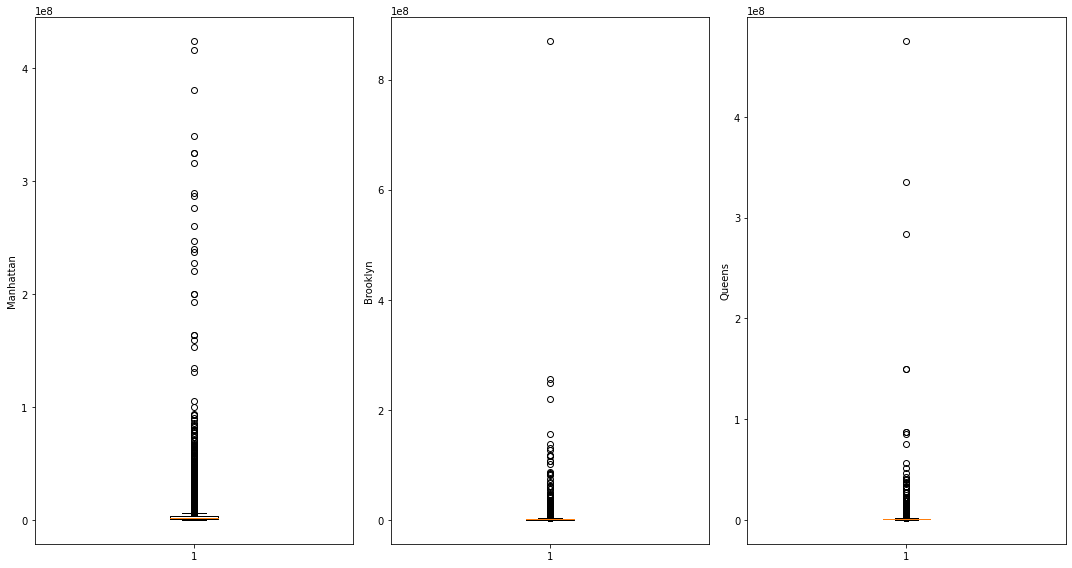

In [193]:
# figsize is width, height
# rows, columns for set up of subplots
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (15,8))

# plot each variable on a boxplot

ax1.boxplot(nyc_subset[nyc_subset['BOROUGH'] == 'Manhattan']['SALEPRICE'], whis = 1.5)
ax2.boxplot(nyc_subset[nyc_subset['BOROUGH'] == 'Brooklyn']['SALEPRICE'], whis = 1.5)
ax3.boxplot(nyc_subset[nyc_subset['BOROUGH'] == 'Queens']['SALEPRICE'], whis = 1.5)

# label each axes
ax1.set_ylabel('Manhattan')
ax2.set_ylabel('Brooklyn')
ax3.set_ylabel('Queens')

# to make y labels fit a bit better
plt.tight_layout()

6. Create another boxplot to visualize the bottom 95% of the sales price data in each Borough (ignore the top 5%). ``df['column'].quantile()`` will be helpful. Do not remove the top 5% just create a graph without those values.

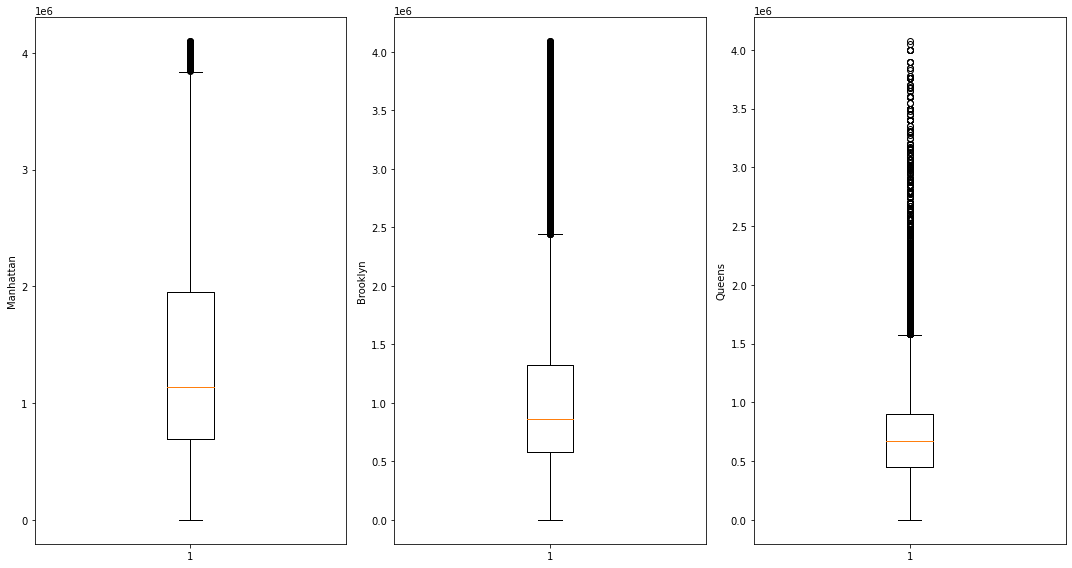

In [194]:
# figsize is width, height
# rows, columns for set up of subplots
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (15,8))


# plot each variable on a boxplot

ax1.boxplot(nyc_subset[(nyc_subset['BOROUGH'] == 'Manhattan') & (nyc_subset['SALEPRICE'] < nyc_subset['SALEPRICE'].quantile(0.95))]['SALEPRICE'], whis = 1.5)
ax2.boxplot(nyc_subset[(nyc_subset['BOROUGH'] == 'Brooklyn') & (nyc_subset['SALEPRICE'] < nyc_subset['SALEPRICE'].quantile(0.95))]['SALEPRICE'], whis = 1.5)
ax3.boxplot(nyc_subset[(nyc_subset['BOROUGH'] == 'Queens') & (nyc_subset['SALEPRICE'] < nyc_subset['SALEPRICE'].quantile(0.95))]['SALEPRICE'], whis = 1.5)



# label each axes
ax1.set_ylabel('Manhattan')
ax2.set_ylabel('Brooklyn')
ax3.set_ylabel('Queens')

# to make y labels fit a bit better
plt.tight_layout()

7. Describe the distribution of sales prices data in each of the last four years. (Just with code, no writing necessary).

In [195]:
nyc_subset.groupby('saleyear')['SALEPRICE'].describe()

,count,mean,std,min,25%,50%,75%,max
saleyear,,,,,,,,
2018,"43,766.00","1,372,922.36","7,004,890.55",1.00,"444,021.75","725,000.00","1,200,000.00","869,612,895.00"
2019,"29,724.00","1,715,414.65","6,239,124.64",1.00,"565,000.00","840,000.00","1,381,273.00","340,000,000.00"
2020,"22,992.00","1,804,016.51","6,835,958.66",1.00,"585,000.00","840,000.00","1,330,000.00","423,957,600.00"
2021,"20,961.00","1,574,510.24","5,344,077.94",1.00,"650,000.00","899,000.00","1,320,000.00","256,795,000.00"


<font color='red' size = '5'> Question 1 </font>

**Describe in words what you learned throughout Task 2.**

In order to frame business questions, we need to describe data in a concise manner. Thus, we learned that we should use the groupby function in order to  collapse a field into its distinct values. We also learned how to incorporate the describe method in order to see the description (distribution) of our numerically grouped dataframe with informations for each column such as count, mean, std, min, max, and percentiles. By analyzing the box plots, we hope to understand our y variable that help us determine the sales price of the borough from respective years: 2018, 2019, 2020, and 2021   
- The distribution of sales price data from grouping by borough and sale year shows us that...
    - Manhattan has the highest avg saleprice of 3,527,773, the highest median (50%) saleprice of 1,440,000, and the highest upperr quartile.
    - 2020 has the highest avg saleprice of 1,715,414 and one of the highest median (50%) saleprice of 840,000. 
    - This shows that there is a high demand for the housing market in Manhattan for the past 4 years, especially in 2020, where we can assume the pandemic and quarantining lifestyle caused a higher demand

---

<font color='blue' size = '5'> Task 3 </font>

## Understand our X-Variable

1. Describe the distribution of gross square feet in each Borough (with data, no writing necessary). You may find some funky values. Troubleshoot and fix.

In [196]:
nyc_subset.groupby('BOROUGH')['GROSSSQUAREFEET'].describe()

,count,mean,std,min,25%,50%,75%,max
BOROUGH,,,,,,,,
Brooklyn,"42,764.00","4,741.00","34,765.05",0.00,828.00,"1,728.00","2,620.00","997,720.00"
Manhattan,"24,303.00","2,968.82","60,321.08",0.00,0.00,0.00,846.00,"8,942,176.00"
Queens,"50,376.00","1,721.88","9,771.81",0.00,"1,020.00","1,404.00","1,978.00","1,741,458.00"


2. Use ``sns.lmplot()`` to create a scatterplot with a regression line that plots sales price as a function of gross square feet.

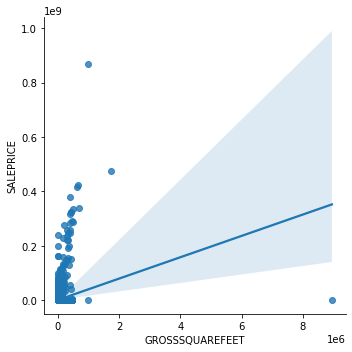

In [197]:
sns.lmplot(x = 'GROSSSQUAREFEET', y = 'SALEPRICE', data= nyc_subset)

3. Describe what you notice in the above graph and you propose needs to be done to clean our variables.

There is an outlier: a house that has been sold with a small amount for a big gross square feet. This phenomenon can pull our regression line down due to bias. We should remove data that is 0 or over/below a certain threshold of the correlation between sale price and gross square feet.

In [202]:
nyc_subset = nyc_subset[nyc_subset.GROSSSQUAREFEET != 0]

4. Assume that any sale with a price per square foot less than the average price per square foot in Oxford, Georgia (where Emory's Oxford campus is location) is a related party transfer and remove this data. The median price per square foot in Oxford, Georgia is \\$140.

5. Rerun your lmplot on the filtered data.

In [198]:
#4

nyc_subset['SALEPRICE_PER_SQUAREFEET'] = nyc_subset['SALEPRICE']/(nyc_subset['GROSSSQUAREFEET'])

nyc_subset = nyc_subset[nyc_subset.SALEPRICE_PER_SQUAREFEET > 140]
nyc_subset

/var/folders/xp/sw_vjs8s7pdcq6bfz9y7pw640000gn/T/ipykernel_892/1087633460.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_subset['SALEPRICE_PER_SQUAREFEET'] = nyc_subset['SALEPRICE']/(nyc_subset['GROSSSQUAREFEET'])


,BOROUGH,NEIGHBORHOOD,BUILDINGCLASSCATEGORY,BLOCK,LOT,ADDRESS,APARTMENTNUMBER,ZIPCODE,RESIDENTIALUNITS,COMMERCIALUNITS,TOTALUNITS,LANDSQUAREFEET,GROSSSQUAREFEET,YEARBUILT,TAXCLASSATTIMEOFSALE,BUILDINGCLASSATTIMEOFSALE,SALEPRICE,SALEDATE,saleyear,SALEPRICE_PER_SQUAREFEET
1,Manhattan,ALPHABET CITY,01 ONE FAMILY DWELLINGS,390.0,61.0,189 EAST 7TH STREET,NaN,10009.0,1.00,0.00,1.00,987.00,"2,183.00",1860-01-01,1.0,A4,"4,844,809.00",2018-05-22,2018,"2,219.34"
2,Manhattan,ALPHABET CITY,01 ONE FAMILY DWELLINGS,400.0,19.0,526 EAST 5TH STREET,NaN,10009.0,1.00,0.00,1.00,"1,883.00","5,200.00",1900-01-01,1.0,A4,"6,100,000.00",2018-12-03,2018,"1,173.08"
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,379.0,37.0,133 AVENUE D,NaN,10009.0,20.00,2.00,22.00,"3,481.00","14,588.00",1930-01-01,2.0,C7,"8,300,000.00",2018-12-10,2018,568.96
7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,385.0,2.0,21-23 AVENUE B,NaN,10009.0,12.00,4.00,16.00,"4,186.00","10,588.00",1900-01-01,2.0,C7,"10,350,000.00",2018-09-07,2018,977.52
8,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,389.0,18.0,200 EAST 7TH STREET,NaN,10009.0,18.00,0.00,18.00,"2,271.00","10,650.00",1910-01-01,2.0,C1,"5,000,000.00",2018-09-05,2018,469.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29584,Queens,WOODSIDE,07 RENTALS - WALKUP APARTMENTS,1330.0,9.0,43-27 57TH STREET,NaN,11377.0,6.00,0.00,6.00,"1,950.00","3,900.00",1931-01-01,2.0,C2,"995,000.00",2021-12-14,2021,255.13
29585,Queens,WOODSIDE,07 RENTALS - WALKUP APARTMENTS,1333.0,65.0,5838 43 AVENUE,NaN,11377.0,6.00,0.00,6.00,"2,142.00","4,320.00",1959-01-01,2.0,C2,"900,000.00",2021-07-28,2021,208.33
29588,Queens,WOODSIDE,07 RENTALS - WALKUP APARTMENTS,1342.0,56.0,42-33 65 STREET,NaN,11377.0,15.00,0.00,15.00,"10,000.00","10,844.00",2003-01-01,2.0,C1,"4,000,000.00",2021-06-08,2021,368.87
29590,Queens,WOODSIDE,07 RENTALS - WALKUP APARTMENTS,2328.0,11.0,4845 58TH LANE,NaN,11377.0,4.00,0.00,4.00,"2,266.00","3,364.00",1985-01-01,2.0,C3,"1,425,000.00",2021-09-03,2021,423.60


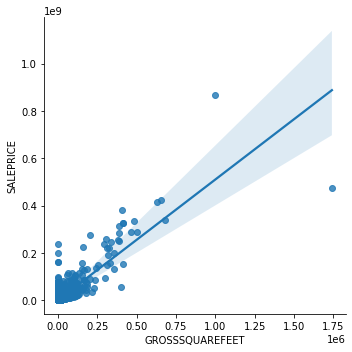

In [199]:
#5
sns.lmplot(x = 'GROSSSQUAREFEET', y = 'SALEPRICE', data= nyc_subset)

6. Create boxplots to visualize the distribution of gross square feet of the properties sold in each Borough.

7. Create another boxplot to visualize the bottom 95% of the gross square footage data in each Borough (ignore the top 5%). ``df['column'].quantile()`` will be helpful. Do not remove the top 5% just create a graph without those values.

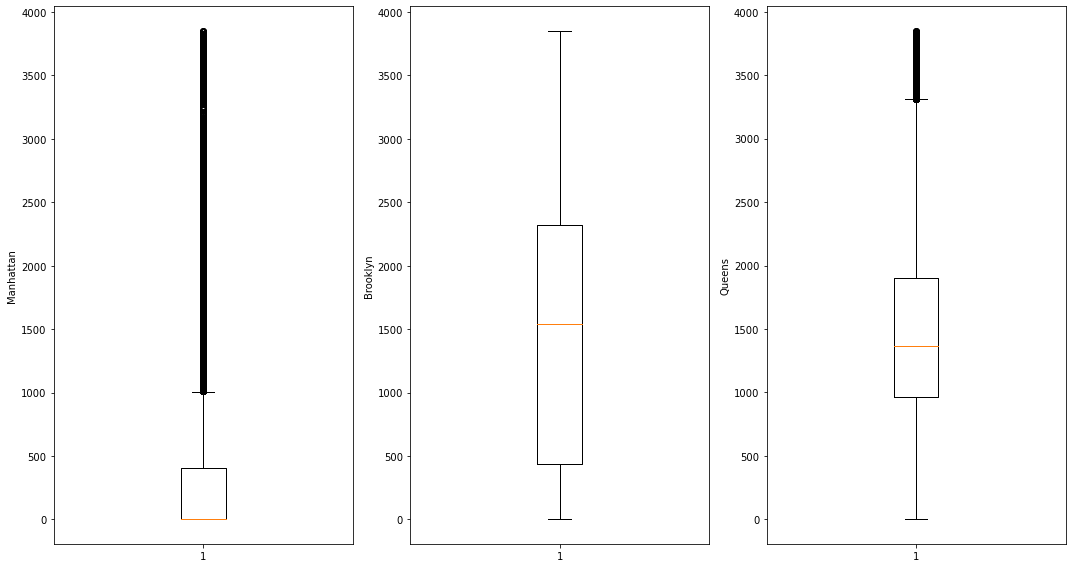

In [200]:
# 7
# figsize is width, height
# rows, columns for set up of subplots
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (15,8))


# plot each variable on a boxplot

ax1.boxplot(nyc_subset[(nyc_subset['BOROUGH'] == 'Manhattan') & (nyc_subset['GROSSSQUAREFEET'] < nyc_subset['GROSSSQUAREFEET'].quantile(0.95))]['GROSSSQUAREFEET'], whis = 1.5)
ax2.boxplot(nyc_subset[(nyc_subset['BOROUGH'] == 'Brooklyn') & (nyc_subset['GROSSSQUAREFEET'] < nyc_subset['GROSSSQUAREFEET'].quantile(0.95))]['GROSSSQUAREFEET'], whis = 1.5)
ax3.boxplot(nyc_subset[(nyc_subset['BOROUGH'] == 'Queens') & (nyc_subset['GROSSSQUAREFEET'] < nyc_subset['GROSSSQUAREFEET'].quantile(0.95))]['GROSSSQUAREFEET'], whis = 1.5)



# label each axes
ax1.set_ylabel('Manhattan')
ax2.set_ylabel('Brooklyn')
ax3.set_ylabel('Queens')

# to make y labels fit a bit better
plt.tight_layout()

<font color='red' size = '5'> Question 2 </font>

**Describe in words what you learned over throughout Task 3 and any thoughts you have on further cleaning this variable.**\

By analyzing the box plots and regression plots, we hope to understand our x variable that help us determine the sales price of the borough from respective years: 2018, 2019, 2020, and 2021

- The distribution and the regression plot of gross square feet data from grouping by borough shows us that...
    - Brooklyn has the highest avg gross square feet of 4,741 and the highest median (50%) gross square feet of 1,728.
    - Brooklyn has a higher (both lower and upper quartile) than Manhattan or Queens with a longer spread of variation (box length).
    - There seems to be a positive correlation between gross square feet and the sale price from the regression . 
    - There seems to be an error in the data that results the distribution of Manhattan because the minimum, 25% quartile, and 50% quartile of gross square feet resulting in 0. 
    - We can also see errors in the regression plot such as outliers that pulls the regression line downwards.
    - This shows that there is a need to remove erroneouos data such as 0 values or data over or below a certain threshold of the correlation between sale price and gross square feet.


---

<font color='blue' size = '5'> Task 4 </font>

Run a regression that predicts sales price based on gross square footage and borough.

Note: .summary2() will display the results in float format rather than scientific notation. Its probably best to look at both.

In [203]:
simple = smf.ols('SALEPRICE ~ GROSSSQUAREFEET + BOROUGH', data = nyc_subset).fit()
simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SALEPRICE   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                 7.961e+04
Date:                Mon, 31 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:01:54   Log-Likelihood:            -1.2801e+06
No. Observations:               77582   AIC:                         2.560e+06
Df Residuals:                   77578   BIC:                         2.560e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.301e+05   2.05e+04      6.354      0.000       9e+04     1.7e+05
BOROUGH[T.Manhattan]  2.768e+06   4.58e+04     60.446      0.000    2.68e+06    2.86e+06
BOROUGH[T.Queens]    -2.316e+05    2.7e+04     -8.577      0.000   -2.84e+05   -1.79e+05
GROSSSQUAREFEET        511.7411      1.074    476.671      0.000     509.637     513.845
==============================================================================
Omnibus:                    44936.140   Durbin-Watson:                   1.512
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      55692516329.712
Skew:                           0.028   Prob(JB):                         0.00
Kurtosis:                    4153.721   Cond. No.                     4.63e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<font color='red' size = '5'> Question 3 </font>

**a. How do you interpret the R squared in this model?**

The regression model shows us that 75% accounts for the variation of our sales price is described by our gross square feet per borough. \
Thus, it is reasonable to associate most of my sales price with "how big is the home in a specific borough". The other (1-75) 25% shows us that it is reasonable to predict sales price from other independent variables (e.g neighborhood, total units, etc).   


**b. How do you interpret each of the coefficients (including the intercept) in this model?** 
- draw out y=mx+b equation and think about the changs in x and y \
- there seems to be a positive correlation between sales price and gross square feet per borough


**c. Your regression likely produced the following error "The condition number is large, 4.63e+04. This might indicate that there are strong multicollinearity or other numerical problems." What does this mean? What do you think may cause the problem?** 
- Multicollinearity
    - In this case, we threw in two x variables (gross square feet and borough) that captures the same thing by being highly correlated
    - standard errors of at least one of the correlated x variables will increases the probability that our coefficient estimate is less accurate and underestimates the statistical significance
- Missing a theoretical link
    - we need to understand our x variables before putting them in regression in order to say that it's reaonsable to think that gross square feet and borough is a proxy for sales price.

<font color='blue' size = '5'> Task 5 </font>

Run the same regression that predicts sales price based on gross square footage and borough except multiply together square footage and borough. 

In [204]:
simple = smf.ols('SALEPRICE ~ GROSSSQUAREFEET * BOROUGH', data = nyc_subset).fit()
simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SALEPRICE   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                 6.504e+04
Date:                Mon, 31 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:02:04   Log-Likelihood:            -1.2707e+06
No. Observations:               77582   AIC:                         2.541e+06
Df Residuals:                   77576   BIC:                         2.541e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                            -2.252e+05   1.88e+04    -11.987      0.000   -2.62e+05   -1.88e+05
BOROUGH[T.Manhattan]                  2.614e+06   4.17e+04     62.700      0.000    2.53e+06     2.7e+06
BOROUGH[T.Queens]                     4.759e+05   2.47e+04     19.240      0.000    4.27e+05    5.24e+05
GROSSSQUAREFEET                        640.2630      1.997    320.662      0.000     636.350     644.177
GROSSSQUAREFEET:BOROUGH[T.Manhattan]   -35.8276      2.497    -14.350      0.000     -40.721     -30.934
GROSSSQUAREFEET:BOROUGH[T.Queens]     -308.3851      2.537   -121.577      0.000    -313.357    -303.414
==============================================================================
Omnibus:                   127344.856   Durbin-Watson:                   1.383
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       3712084243.775
Skew:                           9.604   Prob(JB):                         0.00
Kurtosis:                    1074.431   Cond. No.                     5.48e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<font color='red' size = '5'> Question 4 </font>

Explain how this regression's specification differs from your first regression and why it may be important to specify the regression in this manner. 

In order to avoid issues such as multicollinearity, it would be beneficial to have one independent variable that captures the best fit line for our dependent variable rather than having multiple "same" independent variables that can lead to biased high correlation. 

Thus, when independent variables are the same, multiplying them and the coefficients together and compresses them into a single independent variable would give a more accurate result. 

In this case, our borough and gross square feet being a proxy to estimate sales price was very similar and lead to multicollinearity issues. If we compress these coefficients and variables together into a single independent variable, our r squared rate is 10% higher.